## Analyze User Feedback

In [1]:
import pandas as pd
import os
from sciencesage.config import FEEDBACK_FILE

import matplotlib.pyplot as plt
import seaborn as sns

2025-10-06 17:27:56.277 | INFO     | sciencesage.config:<module>:169 - Configuration loaded.


In [2]:
feedback_path = os.path.join("..", FEEDBACK_FILE)

if os.path.exists(feedback_path) and os.path.getsize(feedback_path) > 0:
    df = pd.read_json(feedback_path, lines=True)
    display(df.head())
else:
    print("Feedback file is missing or empty.")

,timestamp,query,answer,topic,level,feedback,sources
0,2025-10-02 18:57:54.524751+00:00,Who was the first human to travel into outer s...,The first human to travel into outer space was...,Category:Exploration of the Moon,Middle School,up,None
1,2025-10-02 19:01:59.618613+00:00,Who was the second human to travel into space?,I don’t know based on the available information.,Category:Exploration of the Moon,Middle School,down,[]
2,2025-10-02 19:07:47.832871+00:00,Who was the second human to travel into space?,I don’t know based on the available information.,Category:Exploration of the Moon,Middle School,down,[]
3,2025-10-02 23:45:20.279083+00:00,q,a,math,easy,positive,NaN
4,2025-10-02 23:46:37.555483+00:00,q,a,math,easy,positive,NaN


### Feedback Summary Table

In [3]:
summary = df.groupby(["topic", "level", "feedback"]).size().unstack(fill_value=0)
print("Feedback Summary Table:")
print(summary)

Feedback Summary Table:
feedback                                                          down  \
topic                                              level                 
Category:Discovery and exploration of the Solar... Advanced          0   
                                                   College           0   
Category:Exploration of Mars                       Advanced          1   
                                                   College           0   
Category:Exploration of the Moon                   College           1   
                                                   Middle School     2   
Category:Space missions                            Middle School     0   
Space exploration                                  Advanced          0   
                                                   College           1   
                                                   Middle School     0   
math                                               easy              0   

feedback     

### Overall Positive/Negative Feedback Rate

In [4]:
total_feedback = len(df)
positive = (df["feedback"] == "👍").sum()
negative = (df["feedback"] == "👎").sum()
print(f"Total feedback: {total_feedback}")
print(f"Positive: {positive} ({positive/total_feedback:.1%})")
print(f"Negative: {negative} ({negative/total_feedback:.1%})")

Total feedback: 19
Positive: 0 (0.0%)
Negative: 0 (0.0%)


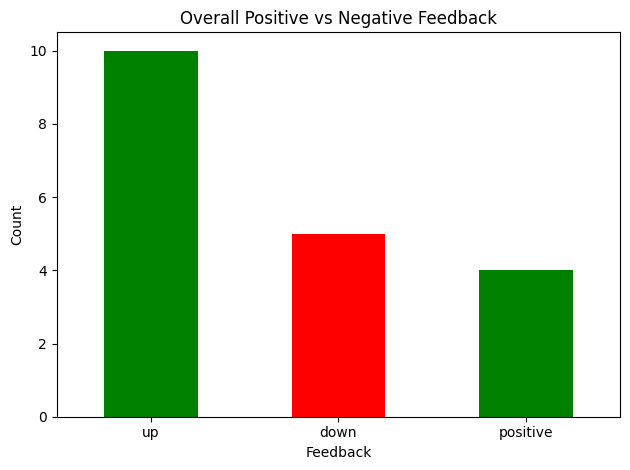

In [5]:
feedback_counts = df['feedback'].value_counts()
feedback_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Overall Positive vs Negative Feedback")
plt.xlabel("Feedback")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Trends Over Time

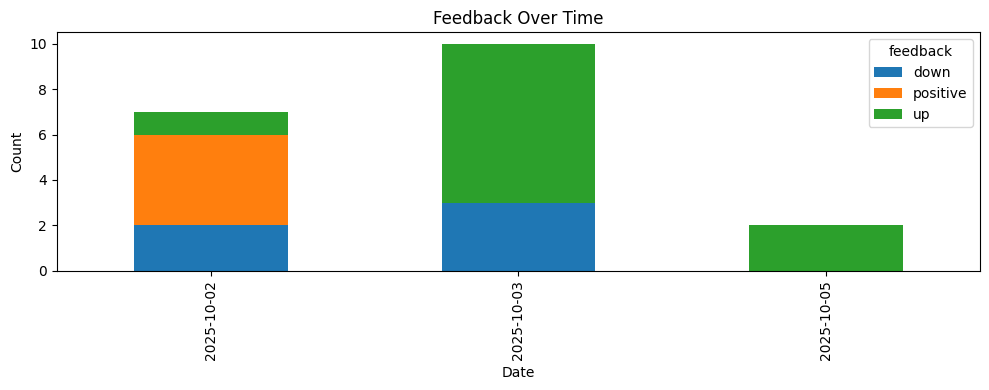

In [6]:
if "timestamp" in df.columns:
    df["date"] = pd.to_datetime(df["timestamp"]).dt.date
    trend = df.groupby(["date", "feedback"]).size().unstack(fill_value=0)
    trend.plot(kind="bar", stacked=True, figsize=(10, 4), title="Feedback Over Time")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # Moving average of positive feedback rate
    daily = df.groupby("date")["feedback"].value_counts().unstack(fill_value=0)
    if "👍" in daily.columns:
        daily["pos_rate"] = daily["👍"] / daily.sum(axis=1)
        daily["pos_rate"].rolling(7, min_periods=1).mean().plot(
             figsize=(10, 3), title="7-day Moving Avg: Positive Feedback Rate"
             )
        plt.xlabel("Date")
        plt.ylabel("Positive Rate")
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.show()

### Breakdown by User Segment

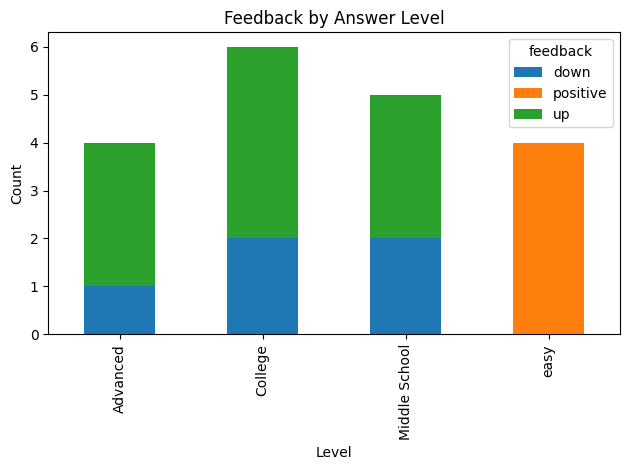

In [7]:
by_level = df.groupby(["level", "feedback"]).size().unstack(fill_value=0)
by_level.plot(kind="bar", stacked=True, title="Feedback by Answer Level")
plt.xlabel("Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Breakdown by Topic

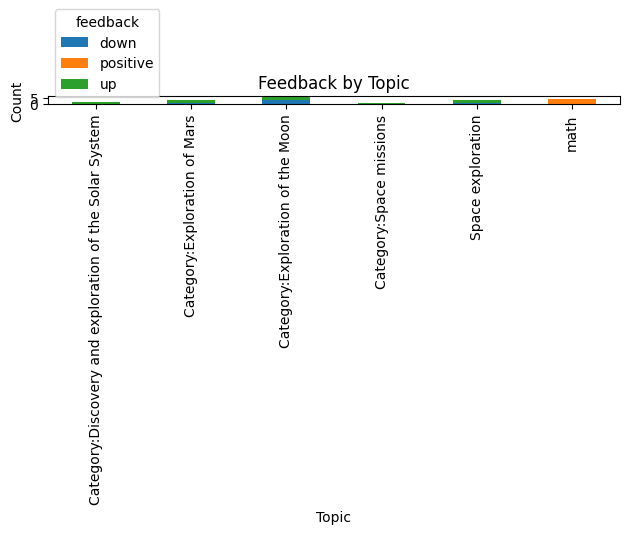

In [8]:
by_topic = df.groupby(["topic", "feedback"]).size().unstack(fill_value=0)
by_topic.plot(kind="bar", stacked=True, title="Feedback by Topic")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Feedback by Topic and Level

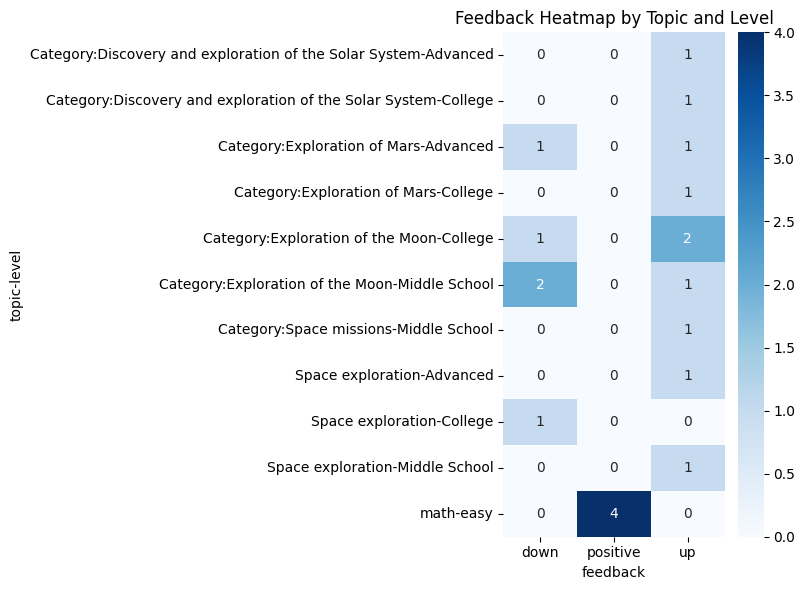

In [9]:
heatmap_data = df.groupby(["topic", "level"])["feedback"].value_counts().unstack(fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues")
plt.title("Feedback Heatmap by Topic and Level")
plt.tight_layout()
plt.show()

### Actionable Insights - Things to Look Into

In [10]:
print("\nActionable Insights:")
low_positive = summary.get("👍", pd.Series()).sort_values().head(3)
if not low_positive.empty:
    print("Topics/levels with lowest positive feedback:")
    print(low_positive)
else:
    print("No positive feedback to analyze.")


Actionable Insights:
No positive feedback to analyze.
